In [30]:
pwd

'/Users/delgade5/Desktop/PythonStuff/team2_repos/Resources'

In [38]:
cd ../team2_repos/Resources/

/Users/delgade5/Desktop/PythonStuff/team2_repos/Resources


In [102]:
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [33]:
csv_files = os.listdir()
csv_files = csv_files[1:]

In [34]:
all_df = dict()
category_list = []

for filename in csv_files:
    df_name = filename.split('.')[0]
    category_list.append(df_name)
    all_df[df_name] = pd.read_csv(filename, encoding='UTF8')

In [35]:
for x in category_list: 
    all_df[x]['Category'] = x

In [36]:
merged_data = pd.concat(all_df.values(), ignore_index=True)
merged_data = merged_data.drop("Operations", axis=1)
merged_data.to_csv('Gun Violence Events')

In [39]:
census_data = pd.read_csv('us_census_sorted_data.csv', encoding='UTF8')

In [63]:
state_list = list(census_data['State Name'])

In [66]:
state_sum = pd.DataFrame(merged_data.groupby('State').sum()['# Killed'])
state_sum.head()

,# Killed
State,
Alabama,200
Alaska,70
Arizona,194
Arkansas,96
California,594


In [95]:
state_category_summary = pd.DataFrame(merged_data.groupby(['State', 'Category'])['# Killed'].sum())
state_category_summary = pd.pivot_table(state_category_summary, values = '# Killed', index = 'State', columns = 'Category').reset_index()
state_category_summary = state_category_summary.fillna(0)
state_category_summary

Category,State,Gun Violence Events,accidental_deaths,accidental_deaths_children,accidental_deaths_teens,accidental_injuries,accidental_injuries_children,accidental_injuries_teens,children_injured,children_killed,mass_shootings_2014,mass_shootings_2015,mass_shootings_2016,mass_shootings_all,officer_involved_shootings,teens_injured,teens_killed
0,Alabama,100.0,14.0,9.0,6.0,0.0,1.0,1.0,3.0,15.0,1.0,4.0,15.0,18.0,2.0,0.0,11.0
1,Alaska,35.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,Arizona,97.0,8.0,4.0,4.0,0.0,0.0,0.0,2.0,21.0,1.0,15.0,12.0,14.0,1.0,0.0,15.0
3,Arkansas,48.0,13.0,5.0,4.0,0.0,0.0,0.0,1.0,7.0,5.0,2.0,2.0,3.0,1.0,1.0,4.0
4,California,297.0,17.0,4.0,9.0,0.0,1.0,1.0,3.0,35.0,45.0,38.0,37.0,59.0,2.0,5.0,41.0
5,Colorado,59.0,11.0,6.0,7.0,0.0,0.0,0.0,0.0,6.0,1.0,4.0,6.0,10.0,0.0,1.0,7.0
6,Connecticut,8.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
7,Delaware,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
8,District of Columbia,13.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,4.0
9,Florida,399.0,34.0,10.0,22.0,0.0,0.0,0.0,9.0,58.0,26.0,18.0,80.0,92.0,0.0,3.0,47.0


In [97]:
joined_data_set = pd.merge(state_category_summary, census_data, on='State', how='left')
joined_data_set

,State,Gun Violence Events,accidental_deaths,accidental_deaths_children,accidental_deaths_teens,accidental_injuries,accidental_injuries_children,accidental_injuries_teens,children_injured,children_killed,...,mass_shootings_all,officer_involved_shootings,teens_injured,teens_killed,Unnamed: 0,Population,income per capita,unemployment_rate(%),poverty_rate(%),no_college_education_rate(%)
0,Alabama,100.0,14.0,9.0,6.0,0.0,1.0,1.0,3.0,15.0,...,18.0,2.0,0.0,11.0,0.0,4817678.0,23936.0,4.747432,18.467610,17.988957
1,Alaska,35.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,19.0,...,0.0,0.0,0.0,5.0,1.0,728300.0,33129.0,4.407112,9.867637,14.591377
2,Arizona,97.0,8.0,4.0,4.0,0.0,0.0,0.0,2.0,21.0,...,14.0,1.0,0.0,15.0,2.0,6561516.0,25537.0,4.634097,17.820714,14.217233
3,Arkansas,48.0,13.0,5.0,4.0,0.0,0.0,0.0,1.0,7.0,...,3.0,1.0,1.0,4.0,3.0,2947036.0,22595.0,3.905280,18.639168,19.922322
4,California,297.0,17.0,4.0,9.0,0.0,1.0,1.0,3.0,35.0,...,59.0,2.0,5.0,41.0,4.0,38066920.0,29906.0,5.476051,16.064457,13.719686
5,Colorado,59.0,11.0,6.0,7.0,0.0,0.0,0.0,0.0,6.0,...,10.0,0.0,1.0,7.0,5.0,5197580.0,31674.0,4.218136,12.772502,12.632783
6,Connecticut,8.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,6.0,3592053.0,38480.0,5.194439,10.154082,17.351609
7,Delaware,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,7.0,917060.0,30191.0,4.342028,11.678734,19.748762
8,District of Columbia,13.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,...,2.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Florida,399.0,34.0,10.0,22.0,0.0,0.0,0.0,9.0,58.0,...,92.0,0.0,3.0,47.0,9.0,19361792.0,26499.0,5.293441,16.316976,18.810816


In [67]:
merged_data.head()

,# Injured,# Killed,Address,Category,City Or County,Incident Date,State,Unnamed: 0
0,0,1,6600 block of Eylers Valley Flint Road,accidental_deaths,Sabillasville,"November 26, 2016",Maryland,NaN
1,0,1,SR Route 65,accidental_deaths,Grand Rapids,"November 26, 2016",Ohio,NaN
2,0,1,Kehoe Road,accidental_deaths,Sandy Creek,"November 24, 2016",New York,NaN
3,0,1,NaN,accidental_deaths,Black Point,"November 24, 2016",Florida,NaN
4,0,1,North 1311 County Road KCI,accidental_deaths,Powell Township,"November 23, 2016",Michigan,NaN


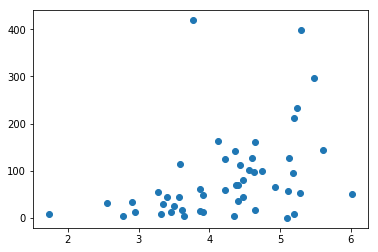

In [107]:
plt.scatter(joined_data_set['unemployment_rate(%)'],joined_data_set['Gun Violence Events'])

In [111]:
pwd

'/Users/delgade5/Desktop/PythonStuff/team2_repos/Resources'

In [110]:
joined_data_set.to_csv('Census-and-Gun-Violence-Events.csv')

In [109]:
np.corrcoef(joined_data_set['unemployment_rate(%)'],joined_data_set['Gun Violence Events'])

array([[nan, nan],
       [nan,  1.]])

In [100]:
census_data = census_data.rename(columns = {'State Name':'State'})
census_data.head()

,Unnamed: 0,State,Population,income per capita,unemployment_rate(%),poverty_rate(%),no_college_education_rate(%)
0,0,Alabama,4817678.0,23936.0,4.747432,18.467610,17.988957
1,1,Alaska,728300.0,33129.0,4.407112,9.867637,14.591377
2,2,Arizona,6561516.0,25537.0,4.634097,17.820714,14.217233
3,3,Arkansas,2947036.0,22595.0,3.905280,18.639168,19.922322
4,4,California,38066920.0,29906.0,5.476051,16.064457,13.719686
